## **Clustering**

- Classical clustering (agglomerative methods)
- kNN - DBSCAN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
## Remove ID
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
## Encode categorical predictors (dummy encoding)
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


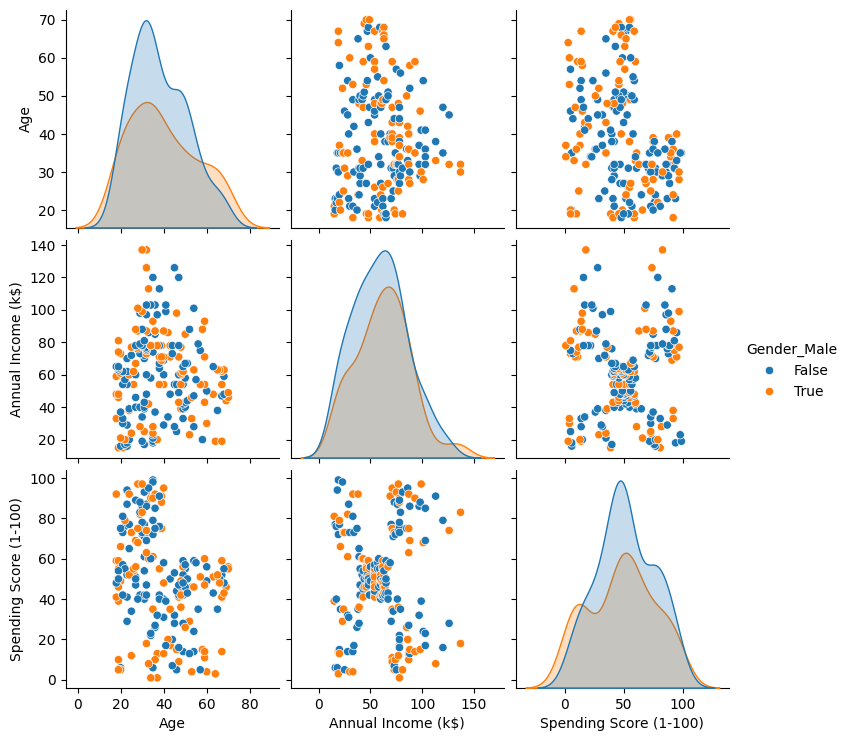

In [4]:
## visualize (pairplot)
sns.pairplot(df, hue = "Gender_Male") ## scatter plot matrix (for a few variables)

## for larger p, construct principal components PC1, PC2 (and plot those)

In [8]:
## analyze customer 0:
cust0 = df.iloc[0].astype('int')
cust0

,0
Age,19
Annual Income (k$),15
Spending Score (1-100),39
Gender_Male,1


In [9]:
## analyze customer 1:
cust1 = df.iloc[1].astype('int')
cust1

,1
Age,21
Annual Income (k$),15
Spending Score (1-100),81
Gender_Male,1


In [10]:
## analyze customer 196:
cust196 = df.iloc[196].astype('int')
cust196

,196
Age,45
Annual Income (k$),126
Spending Score (1-100),28
Gender_Male,0


#### **Distances**

In clustering, distance are the main metric. Options are:

- L2 Norm (Euclidean)
- L1 Norm (Manhattan)
- Statistical Distance (Mahalanobis)
- Cosine Similarity (dot product)

In [14]:
## L2 norm (faster)
np.linalg.norm(cust0 - cust196, ord = 2)

np.float64(114.53820323368095)

In [15]:
## L1 norm
np.linalg.norm(cust0 - cust196, ord = 1)

np.float64(149.0)

In [19]:
## statistical distance

## cov matrix
# df.cov()

## corr matrix: cov / std
# df.corr()

(cust0 - cust1).T.dot(np.linalg.inv(df.cov())).dot(cust0 - cust1)

np.float64(3.1602348969137606)

In [20]:
## cosine similarity
## very usual in text data

cust0.dot(cust1) / (np.linalg.norm(cust0, ord = 2) * np.linalg.norm(cust1, ord = 2))

np.float64(0.9694083417771231)

### **Classical Clustering Techniques**

Bottom-up approach. It starts with no clusters, then adds customers to clusters depending on their distance (metric) and then adjusts clusters based on how similar the observations are.

In [24]:
from sklearn.cluster import AgglomerativeClustering

## instance
AC = AgglomerativeClustering(n_clusters = 5, metric = "euclidean", linkage = "ward")

## fit transform
AC_assigned_C = AC.fit_predict(df)
AC_assigned_C

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

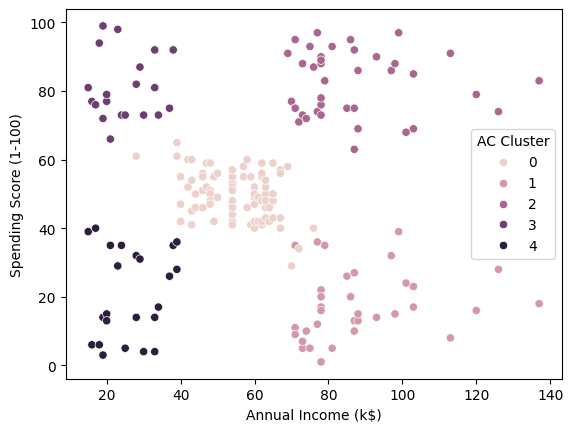

In [25]:
## plot
df['AC Cluster'] = AC_assigned_C
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "AC Cluster")

#### **How to find number of clusters?**

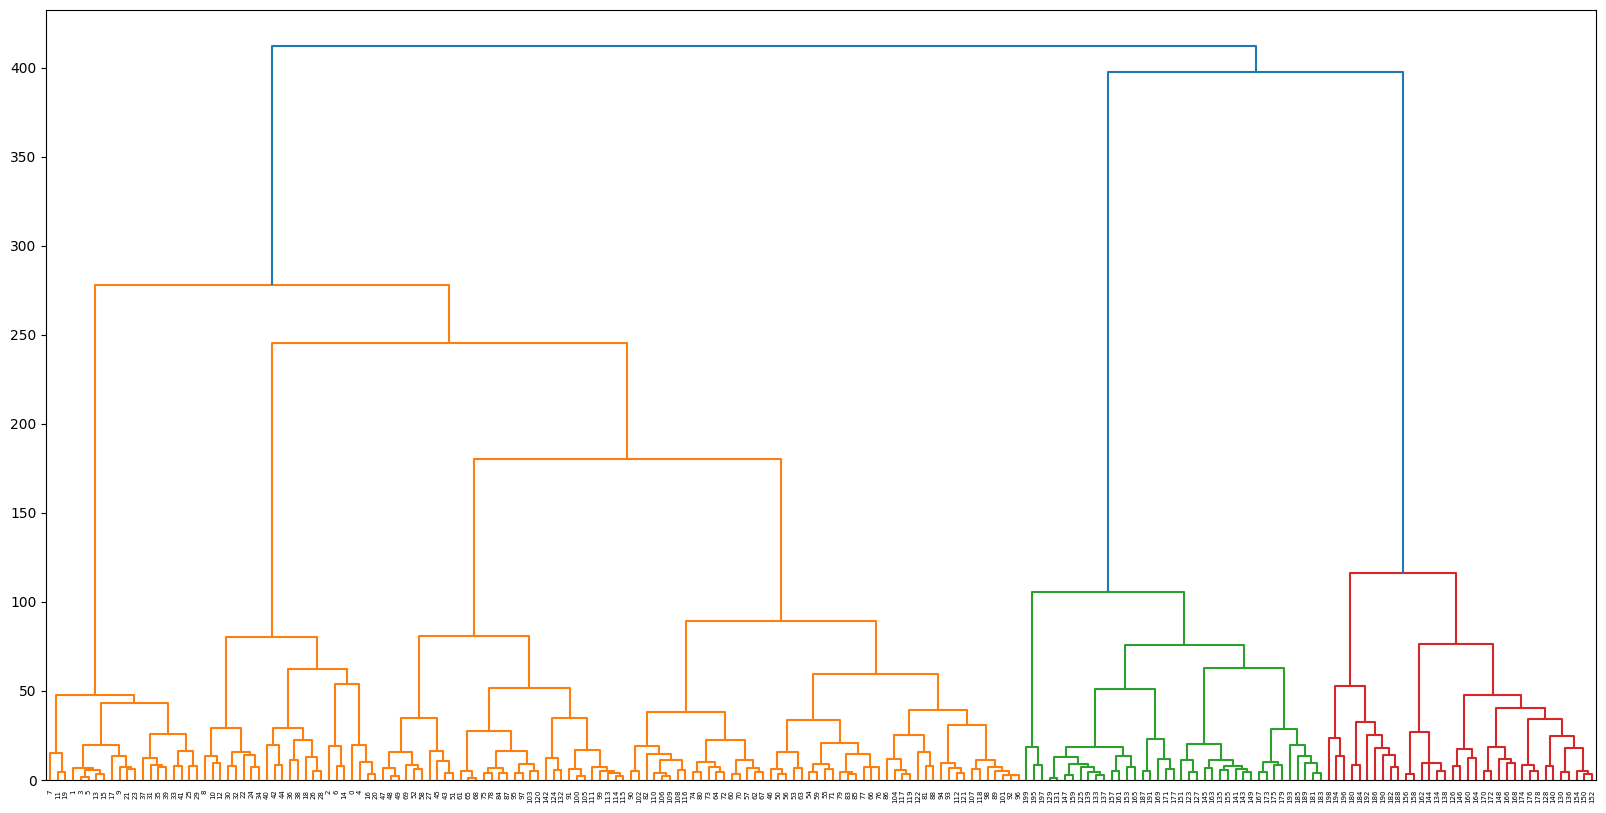

In [27]:
## if obs are not too many: dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
linkage_data = linkage(df, method = "ward", metric = "euclidean")
dendrogram(linkage_data)
plt.show()

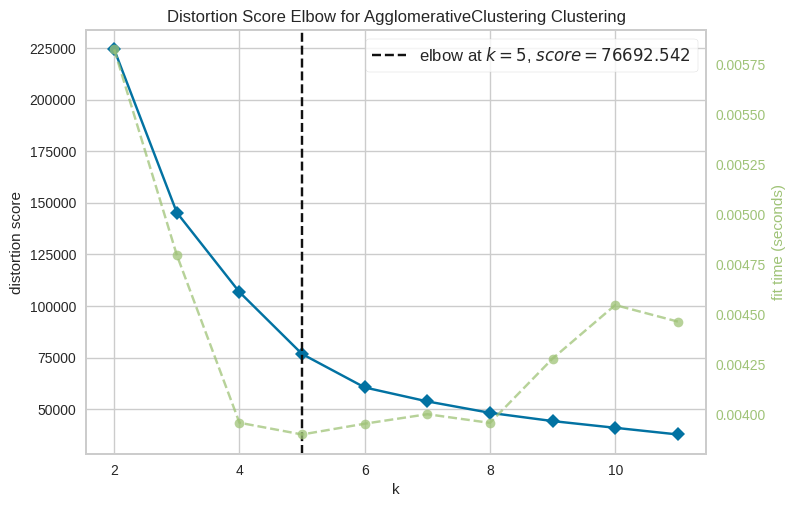

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
## Elbow
from yellowbrick.cluster import KElbowVisualizer

model = KElbowVisualizer(AgglomerativeClustering(), k = (2,12))
model.fit(df)
model.show()

## **Clustering on Text Data**

In [31]:
## Sentiment analysis
## Recommendations
review1 = "Outstanding performance and unbeatable value for the price"  ## positive
review2 = "Arrived defective and lacked features"                       ## negative
review3 = "I was impressed by its exceptional build , value, and outstanding performance" ## positive
review4 = "Looks impressive and well-designed, but unfortunately fails to deliver when it matters" ## negative

## vectorization (transform sentences, words to vectors)
Reviews = [review1, review2, review3, review4]  ## methods require either list or variable df['Reviews']

In [33]:
## CountVectorizer (counts number of times a token appears)
## reviews are obs, tokens are varibles
from sklearn.feature_extraction.text import CountVectorizer

## instance
CV = CountVectorizer(stop_words="english", max_features=8)

vectorized_reviews = CV.fit_transform(Reviews)

In [34]:
## frequencies
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
## sparse (a lot zeros)
vectorized_reviews

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11 stored elements and shape (4, 8)>

In [36]:
## dense
vectorized_reviews.todense()

matrix([[0, 0, 0, 0, 0, 1, 1, 1],
        [1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 1, 0, 0, 0, 0]])

In [37]:
## tokens
CV.get_feature_names_out()

array(['arrived', 'build', 'defective', 'designed', 'exceptional',
       'outstanding', 'performance', 'value'], dtype=object)

In [38]:
pd.DataFrame(vectorized_reviews.todense(), columns = CV.get_feature_names_out())

,arrived,build,defective,designed,exceptional,outstanding,performance,value
0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,0,0
2,0,1,0,0,1,1,1,1
3,0,0,0,1,0,0,0,0


In [40]:
## vectorizers do not take into account context
## for context an embedding vector might be better
from sentence_transformers import SentenceTransformer

## instance
ST = SentenceTransformer('all-MiniLM-L6-v2')

## vector embedding
X = ST.encode(Reviews)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [41]:
## embedding vector of fixed size
X.shape

(4, 384)

In [42]:
X

array([[-0.05215912,  0.05098662, -0.09784721, ..., -0.2044933 ,
        -0.03102042,  0.07591396],
       [ 0.01429154, -0.00062865,  0.09071309, ...,  0.03197072,
         0.00766176,  0.00738017],
       [-0.06970828,  0.06297737, -0.02232909, ..., -0.09510472,
        -0.02816004,  0.08921555],
       [-0.03344904,  0.06423126,  0.01333224, ..., -0.08078485,
        -0.00404184,  0.08259457]], dtype=float32)